Work done so far: change all data types, drop some corrupted rows with at start_time and end_time
Delete all rows with null value.
Calculating idle time (station-level)

Import weather data

Next: working on weather and location data.
Visualize each part
Decide on which regression models we should use


In [3]:
# import all relevant libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
import seaborn as sns

sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

# also import these "new" libraries
# Note: you may have to download an add them to your environment (using e.g. 'conda install -c conda-forge folium')
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime  # for working with times objects
from datetime import timedelta  # for working with times objects
import geopandas as gpd
import math
import random

## Step 1: Import Data 

In [4]:
# load csv file and set the index column by 0
df = pd.read_csv("baywheels_2019", encoding="ISO-8859-1", index_col=0)
df.head(20)

c:\Users\riven\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2019-10-28 09:46:47,2019-10-28 09:51:05,50.0,37.780526,-122.390288,453.0,37.777934,-122.396973,12424.0
1,2019-08-10 19:31:02,2019-08-10 19:35:05,285.0,37.783521,-122.431158,74.0,37.776435,-122.426244,1718.0
2,2019-05-27 13:18:58,2019-05-27 13:46:37,10.0,37.795393,-122.40477,399.0,37.802636,-122.436289,608.0
3,2019-07-24 22:47:58,2019-07-24 22:52:48,106.0,37.763242,-122.430675,72.0,37.772406,-122.43565,551642.0
4,2019-04-28 17:26:22,2019-04-28 17:31:54,80.0,37.775235,-122.397437,50.0,37.780526,-122.390288,1103.0
5,2019-04-17 19:39:05,2019-04-17 19:49:26,100.0,37.7671,-122.410662,74.0,37.776435,-122.426244,1473.0
6,2019-02-26 08:11:01,2019-02-26 08:22:58,67.0,37.776639,-122.395526,8.0,37.799953,-122.398525,4984.0
7,2019-02-02 09:23:15,2019-02-02 09:34:20,44.0,37.781074,-122.411738,55.0,37.777053,-122.429558,2666.0
8,2019-05-07 12:08:01,2019-05-07 12:12:00,9.0,37.798572,-122.400869,6.0,37.80477,-122.403234,1961.0
9,2019-09-04 21:58:19,2019-09-04 22:09:07,86.0,37.769305,-122.426826,39.0,37.778999,-122.436861,9717.0


In [5]:
# take a look at the data types and general information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2507003 entries, 0 to 2507002
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   start_time         object
 1   end_time           object
 2   start_station_id   object
 3   start_station_lat  object
 4   start_station_lon  object
 5   end_station_id     object
 6   end_station_lat    object
 7   end_station_lon    object
 8   bike_id            object
dtypes: object(9)
memory usage: 191.3+ MB
None
       start_time end_time  start_station_id  start_station_lat  \
count     2507003  2507003         2426269.0       2.507003e+06   
unique    2304544  2303004             867.0       7.712800e+04   
top       Failure  Failure              58.0       3.777662e+01   
freq           10       10           34467.0       3.446700e+04   

        start_station_lon  end_station_id  end_station_lat  end_station_lon  \
count        2.507003e+06       2424101.0     2.507003e+06     2.507003e+06   
unique

We can see that the data types are not specified which makes it hard to work with. After inspecting the dataset, there are rows containing "Failure" so we want to remove all of these. 

In [6]:
# create a new data frame that containts all failure rows from dft
rent_failure = df["start_time"].str.contains("Failure")
data_failure = df[rent_failure]
data_failure

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
381556,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
485428,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
621119,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
713198,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1150787,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1558857,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1676023,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1697405,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1999499,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
2249494,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure


In [7]:
# remove all rows that match failure rows
df = df.drop(data_failure.index, axis=0)

## Step 2: Transform Data

Now we have to convert every feature to the correct data types in order to to make calculations and analysis.

In [8]:
df["bike_id"]= pd.to_numeric(df["bike_id"], errors='coerce')
df["bike_id"]= df["bike_id"].astype('Int64')
df["start_station_lat"]= pd.to_numeric(df["start_station_lat"], errors='coerce')
df["start_station_lon"]=pd.to_numeric(df["start_station_lon"], errors='coerce')
df['start_station_lat'] = df['start_station_lat'].round(6)
df['start_station_lon'] = df['start_station_lon'].round(6)
df["end_station_lat"]=pd.to_numeric(df["end_station_lat"], errors='coerce')
df["end_station_lon"]=pd.to_numeric(df["end_station_lon"], errors='coerce')
df["start_station_id"] =pd.to_numeric(df["start_station_id"], errors='coerce')
df["start_station_id"]= df["start_station_id"].astype("Int64")
df["end_station_id"] =pd.to_numeric(df["end_station_id"], errors='coerce')
df["end_station_id"]= df["end_station_id"].astype("Int64")

df["start_time"]= pd.to_datetime(df["start_time"],format ='%Y-%m-%d %H:%M:%S')
df["end_time"]= pd.to_datetime(df["end_time"],format ='%Y-%m-%d %H:%M:%S')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506993 entries, 0 to 2507002
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   start_time         datetime64[ns]
 1   end_time           datetime64[ns]
 2   start_station_id   Int64         
 3   start_station_lat  float64       
 4   start_station_lon  float64       
 5   end_station_id     Int64         
 6   end_station_lat    float64       
 7   end_station_lon    float64       
 8   bike_id            Int64         
dtypes: Int64(3), datetime64[ns](2), float64(4)
memory usage: 198.4 MB
None


In [9]:
# After transforming the data we check if there are any non-defined values.
df.isna().sum()

start_time               0
end_time                 0
start_station_id     80734
start_station_lat        0
start_station_lon        0
end_station_id       82902
end_station_lat          0
end_station_lon          0
bike_id                  1
dtype: int64

In [10]:
df[df["start_station_id"].isnull() | df["end_station_id"].isnull()]

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
17,2019-07-28 13:49:45,2019-07-28 14:17:33,<NA>,37.806791,-122.419491,<NA>,37.798469,-122.401155,928582
33,2019-12-12 17:49:31,2019-12-12 18:08:43,<NA>,37.334925,-121.892451,<NA>,37.336896,-121.876394,211150
35,2019-07-22 16:46:26,2019-07-22 17:17:12,<NA>,37.801673,-122.444816,<NA>,37.807854,-122.418555,183615
54,2019-07-17 08:49:28,2019-07-17 09:07:23,<NA>,37.856264,-122.285781,256,37.875112,-122.260553,392211
64,2019-07-24 11:56:17,2019-07-24 12:05:06,<NA>,37.804854,-122.269595,<NA>,37.798805,-122.260244,250740
...,...,...,...,...,...,...,...,...,...
2506932,2019-12-02 07:31:20,2019-12-02 08:36:24,<NA>,37.332835,-121.892882,<NA>,37.402764,-121.940023,419120
2506941,2019-12-04 04:57:36,2019-12-04 05:03:18,<NA>,37.310447,-121.895164,<NA>,37.311285,-121.884870,676328
2506972,2019-11-28 22:30:18,2019-11-28 22:35:15,<NA>,37.342053,-121.910386,<NA>,37.342588,-121.911388,211150
2506975,2019-07-22 13:18:37,2019-07-22 13:32:23,<NA>,37.803232,-122.400816,<NA>,37.791067,-122.400340,904759


## Step 3: Handle missing and incorrect values

Firstly, we noticed that there are entries which have invalid start or end time (not in 2019). Since the amount of it is less than 5%, we can remove these.

In [11]:
# drop some rows with start_time in 2013
df.drop(df[(df['start_time'].dt.year < 2018) | (df['start_time'].dt.year > 2020)].index, inplace=True)
df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2019-10-28 09:46:47,2019-10-28 09:51:05,50,37.78053,-122.39029,453,37.77793,-122.39697,12424
1,2019-08-10 19:31:02,2019-08-10 19:35:05,285,37.78352,-122.43116,74,37.77643,-122.42624,1718
2,2019-05-27 13:18:58,2019-05-27 13:46:37,10,37.79539,-122.40477,399,37.80264,-122.43629,608
3,2019-07-24 22:47:58,2019-07-24 22:52:48,106,37.76324,-122.43067,72,37.77241,-122.43565,551642
4,2019-04-28 17:26:22,2019-04-28 17:31:54,80,37.77523,-122.39744,50,37.78053,-122.39029,1103
...,...,...,...,...,...,...,...,...,...
2506998,2019-04-12 19:11:48,2019-04-12 19:17:34,109,37.76332,-122.42190,381,37.75824,-122.42609,6118
2506999,2019-07-16 19:02:32,2019-07-16 19:06:54,58,37.77662,-122.41738,5,37.78390,-122.40844,1479
2507000,2019-05-29 16:03:26,2019-05-29 16:09:25,23,37.79146,-122.39103,15,37.79539,-122.39420,1742
2507001,2019-08-19 08:32:17,2019-08-19 08:41:26,23,37.79146,-122.39103,364,37.77200,-122.38997,10107


Secondly, there are missing values in <b>start_station_id</b> and <b>end_station_id</b> column. We tried different approaches to handle these values:
- Using <b>k-means clustering algorithm</b> to assign an ID to the given longtitudes and latitudes.

- <b>Dropping</b> all rows with missing values.

The cost of performing the first method was higher than the latter and the amount of missing values take up less than 5%, so we decided to opt for the second approach.

In [12]:
df.drop(df[df['start_station_id'].isnull() | df['end_station_id'].isnull()].index, inplace = True)

In [ ]:
df.hist(bins = 12, figsize = (20, 10))

Something can be interpreted from the above graph:
the stations with the station_id under 150 are more occupied than the rest, maybe they are located within city center?




Now let's try to calculate idle time
2 approach: idle time group by bike_id, and idle time group by station_id



Let's go with the second approach


In [ ]:
start_stations =df.loc[:,['start_time', 'start_station_id', 'bike_id']]
start_stations["rented"] = 1
start_stations.rename(columns = {"start_time": "timestamp", 'start_station_id': "station_id"}, inplace=True)
start_stations


Now we want to try the second approach.

In [ ]:
end_stations =df.loc[:,['end_time', 'end_station_id', 'bike_id']]
end_stations["rented"] = 0
end_stations.rename(columns={"end_time": "timestamp", 'end_station_id': "station_id"}, inplace=True)
end_stations

In [ ]:
df_merged = pd.concat([start_stations, end_stations], axis = 0)
df_merged = df_merged.sort_values(by = ["station_id", "timestamp"])
df_merged['idle_time'] = pd.Timedelta(0)
df_merged

We define a function that calculates idle time with the help of a nested loop inside the dataframe

In [ ]:


def idle_cal(df):
    
    df = df.groupby('station_id')
    results = []  # List to store the modified groups
    for group_name, group_data in df:
        group_data.sort_values(by = 'timestamp', inplace = True)
        group_data.reset_index(drop=True, inplace=True)
    
        group_data['prev_row'] = group_data.groupby("station_id")['timestamp'].shift(1)
        for i, row in group_data.iterrows():
            if i != 0:
                if row['rented'] == 1:
                    idle_time = pd.Timedelta(0)
                    #print('idle at i ', i , ':', idle_time)
                    j = i - 1 
                    while j>=1 and group_data.at[j,'rented'] == 0:
                        idle_time = group_data.at[i,'timestamp'] -  group_data.at[j,'timestamp']
                        group_data.at[j,'idle_time'] = idle_time
                        #print('idle at j ', j , ':',  idle_time)
                        j -= 1
                    
        results.append(group_data)

    modified_df = (pd.concat(results, ignore_index=True))
    df = pd.DataFrame(modified_df)
    return df
    
                    
        

              


In [ ]:
df_merged = idle_cal(df_merged)
df_merged.head(100)

In [ ]:
df_merged.to_csv('idle_time_calculated')  

In [ ]:
notnull =df_merged[df_merged['idle_time']!=pd.Timedelta(0)]
print(notnull)

In [3]:
df_w_idle_time = pd.read_csv("idle_time_calculated")
idle_time_per_trip = df_w_idle_time[df_w_idle_time['rented'] == 0]


In [13]:
df_w_idle_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4814518 entries, 0 to 4814517
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   timestamp   object
 2   station_id  int64 
 3   bike_id     int64 
 4   rented      int64 
 5   idle_time   object
dtypes: int64(4), object(2)
memory usage: 220.4+ MB


In [4]:
df_w_idle_time['timestamp']= pd.to_datetime(df_w_idle_time['timestamp'],format ='%Y-%m-%d %H:%M:%S')

In [5]:

df_w_idle_time['sum_idle_time']= pd.Timedelta(0)
df_w_idle_time['idle_mode_count']= 0
df_w_idle_time['month']= df_w_idle_time['timestamp'].dt.month

#df_w_idle_time.head(10)


In [6]:
def get_weekday(ts):
    return ts.weekday()


In [7]:
df_w_idle_time['day']= df_w_idle_time['timestamp'].dt.day
df_w_idle_time['hour']= df_w_idle_time['timestamp'].dt.hour
df_w_idle_time['day_of_week']= df_w_idle_time["timestamp"].apply(lambda x: get_weekday(x))


In [8]:
df_w_idle_time

,Unnamed: 0,timestamp,station_id,bike_id,rented,idle_time,sum_idle_time,idle_mode_count,month,day,hour,day_of_week
0,0,2019-01-01 01:05:01,3,5426,0,0 days 00:06:18,0 days,0,1,1,1,1
1,1,2019-01-01 01:11:19,3,5481,1,0 days 00:00:00,0 days,0,1,1,1,1
2,2,2019-01-01 01:23:27,3,5216,1,0 days 00:00:00,0 days,0,1,1,1,1
3,3,2019-01-01 01:40:07,3,5426,1,0 days 00:00:00,0 days,0,1,1,1,1
4,4,2019-01-01 05:03:40,3,5191,1,0 days 00:00:00,0 days,0,1,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4814513,4814513,2019-12-30 14:29:13,498,10962,0,0 days 00:00:23,0 days,0,12,30,14,0
4814514,4814514,2019-12-30 14:29:36,498,10962,1,0 days 00:00:00,0 days,0,12,30,14,0
4814515,4814515,2019-12-30 14:36:08,498,10962,0,0 days 20:52:52,0 days,0,12,30,14,0
4814516,4814516,2019-12-31 11:29:00,498,10962,1,0 days 00:00:00,0 days,0,12,31,11,1


In [19]:
def sum_idle_cal(df):
    
    df = df.groupby('station_id')
    results = {}  # dict to store the modified groups
    
    for group_name, group_data in df:
        group_data.sort_values(by = 'timestamp', inplace = True)
        group_data.reset_index(drop=True, inplace=True)
        sum_idle_time= pd.Timedelta(0)
        idle_mode_count = 0
    
        for i, row in group_data.iterrows():
            if i != 0:
                j = i - 1
                
                if row['rented']==0 and group_data.at[j,'rented'] == 1:
                    sum_idle_time += group_data.at[j,'sum_idle_time']+ group_data.at[i,'idle_time']
                    idle_mode_count +=1
                else:
                    sum_idle_time += group_data.at[j,'sum_idle_time']
                    
            else:
                sum_idle_time+= group_data.at[i,'idle_time']
                
                idle_mode_count+= 1
    
        
        results[str(group_name)] = [sum_idle_time, idle_mode_count]
            
                    
                    
                    
            
    

    return results

In [28]:
def monthly_idle_sum(month):
    df = df_w_idle_time[df_w_idle_time['month'] == month]
    idle_in_month = sum_idle_cal(df)
    df = pd.DataFrame(columns= ["station_id", "idle_sum", "idle_count"])
    df["station_id"] = idle_in_month.keys()
    modified_values = list(zip(*idle_in_month.values()))
    df["idle_sum"] = modified_values[0]
    df["idle_count"] = modified_values[1]
    df["idle_avg"] = (df["idle_sum"]/ df["idle_count"]).dt.round('1s')
    df['month']= month
    return df

In [29]:
#Do not run this
jan= monthly_idle_sum(1)
feb= monthly_idle_sum(2)
mar= monthly_idle_sum(3)
apr= monthly_idle_sum(4)
may= monthly_idle_sum(5)
jun= monthly_idle_sum(6)
jul= monthly_idle_sum(7)
aug= monthly_idle_sum(8)
sep= monthly_idle_sum(9)
oct= monthly_idle_sum(10)
nov= monthly_idle_sum(11)
dec= monthly_idle_sum(12)



In [32]:
# Do not run this
monthly_df_summary= pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec], axis = 0)
monthly_df_summary['station_id']=pd.to_numeric(monthly_df_summary['station_id'])
monthly_df_summary= monthly_df_summary.sort_values(['month','station_id'])
monthly_df_summary


,station_id,idle_sum,idle_count,idle_avg,month
0,3,13 days 01:04:12,1472,0 days 00:12:46,1
1,4,10 days 20:36:26,321,0 days 00:48:43,1
2,5,12 days 04:06:56,1212,0 days 00:14:28,1
3,6,18 days 03:41:10,1095,0 days 00:23:52,1
4,7,11 days 22:48:27,305,0 days 00:56:25,1
...,...,...,...,...,...
417,492,7 days 18:55:37,22,0 days 08:29:48,12
418,493,17 days 18:13:17,161,0 days 02:38:50,12
419,494,6 days 03:54:03,6,1 days 00:39:00,12
420,495,12 days 23:35:16,13,0 days 23:58:06,12


In [33]:
monthly_df_summary.to_csv("monthly sum and average per station")

In [9]:
df_w_idle_time_copy = df_w_idle_time.copy()
df_w_idle_time_copy['idle_time'] = pd.to_timedelta(df_w_idle_time['idle_time']).dt.total_seconds()/60
print(df_w_idle_time_copy['idle_time'])

0             6.300000
1             0.000000
2             0.000000
3             0.000000
4             0.000000
              ...     
4814513       0.383333
4814514       0.000000
4814515    1252.866667
4814516       0.000000
4814517       0.000000
Name: idle_time, Length: 4814518, dtype: float64


In [19]:
max_idle_time = df_w_idle_time_copy['idle_time'].max()
print(max_idle_time)

max_station = df_w_idle_time_copy[round(df_w_idle_time_copy['idle_time']) == round(max_idle_time)]
print(max_station)

112155.01666666666
         Unnamed: 0           timestamp  station_id  bike_id  rented   
4305678     4305678 2019-03-18 13:07:36         344     6215       0  \

             idle_time sum_idle_time  idle_mode_count  month  day  hour   
4305678  112155.016667        0 days                0      3   18    13  \

         day_of_week  
4305678            0  


In [14]:
hour = df_w_idle_time_copy[df_w_idle_time_copy["rented"] == 0]["hour"]
idle_time = df_w_idle_time_copy[df_w_idle_time_copy["rented"] == 0]["idle_time"]
idle_time = [round(x) for x in idle_time]
print(idle_time)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
avg_values = df_w_idle_time_copy[(df_w_idle_time_copy["rented"] == 0) & (df_w_idle_time_copy["idle_time"] > 0.0)].groupby('hour')['idle_time'].mean()
print(avg_values)

hour
0     358.193809
1     330.618529
2     333.821144
3     265.824640
4     193.959576
5     116.505993
6      67.477305
7      42.193631
8      36.835221
9      44.474508
10     62.722174
11     69.985569
12     69.045411
13     76.809550
14     73.433805
15     72.527267
16     62.244171
17     63.918300
18     90.953594
19    132.605991
20    183.558893
21    240.336702
22    295.538146
23    335.532310
Name: idle_time, dtype: float64


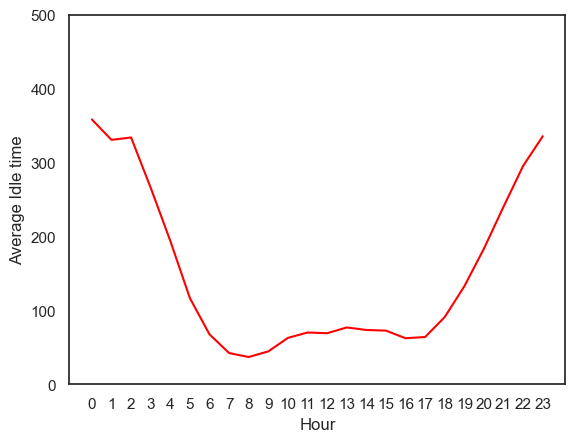

<Figure size 2000x1000 with 0 Axes>

In [48]:
plt.xlabel("Hour")
plt.ylabel("Average Idle time")
x_values = range(0,24,1) 
plt.plot(x_values,avg_values, color = "red") 
plt.ylim(0,500)
plt.xticks(range(0, 24, 1))
plt.figure(figsize = (20,10))
plt.show()

# Working with location

In [13]:
location_df=pd.read_csv("NorthernCalifornia_POIs")
location_df= location_df.drop(location_df[(location_df['lat'].isnull())| (location_df['lon'].isnull())].index)

             

c:\Users\riven\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,10,12,13,14,21,22,25,26,27,28,29,31,32,33,34,35,36,37,38,39,41,42,43,44,46,47,48,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,87,88,89,90,91,92,93,94,95,96,97,98,100,101,104,105,106,107,108,109,110,111,112,113) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109197 entries, 0 to 109196
Columns: 114 entries, Unnamed: 0 to tyres
dtypes: float64(3), int64(3), object(108)
memory usage: 95.8+ MB


In [57]:
location_geo = gpd.GeoDataFrame(location_df, geometry=gpd.points_from_xy(location_df['lon'], location_df['lat']))

In [58]:
city =["San Francisco","South San Francisco"]
location_geo = location_geo[location_geo['addr:city'].isin(city)] 



In [60]:
location_geo['amenity'].unique()

array(['pub', 'bar', 'post_box', nan, 'cinema', 'nightclub', 'restaurant',
       'parking', 'library', 'cafe', 'animal_boarding', 'pharmacy',
       'bank', 'place_of_worship', 'language_school', 'nursing_home',
       'school', 'post_office', 'doctors', 'college', 'fuel', 'police',
       'theatre', 'taxi', 'car_rental', 'dentist', 'fast_food', 'clinic',
       'ice_cream', 'social_centre', 'car_sharing', 'music_school',
       'arts_centre', 'community_centre', 'parking_entrance',
       'social_facility', 'prep_school', 'conference_centre',
       'vending_machine', 'vintage and modern resale', 'studio',
       'bicycle_rental', 'ferry_terminal', 'bicycle_repair_station',
       'atm', 'veterinary', 'fire_station', 'training', 'dojo',
       'credit_union', 'popcorn', 'spa', 'animal_shelter', 'kindergarten',
       'childcare', 'bicycle_parking', 'hospital', 'public_bath',
       'events_venue', 'bus_station', 'charging_station',
       'chocolate;dessert;ice_cream', 'hookah_lounge

In [59]:
location_geo.dropna(axis= 'columns',thresh=2000, inplace=True)

In [61]:
location_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3425 entries, 60 to 108650
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        3425 non-null   int64   
 1   version           3425 non-null   int64   
 2   timestamp         3425 non-null   int64   
 3   changeset         3425 non-null   float64 
 4   id                3425 non-null   object  
 5   tags              3108 non-null   object  
 6   lat               3425 non-null   float64 
 7   lon               3425 non-null   float64 
 8   addr:city         3425 non-null   object  
 9   addr:housenumber  3309 non-null   object  
 10  addr:postcode     2409 non-null   object  
 11  addr:street       3373 non-null   object  
 12  name              3369 non-null   object  
 13  amenity           2013 non-null   object  
 14  geometry          3425 non-null   geometry
 15  osm_type          3425 non-null   object  
dtypes: float64(3)

In [62]:
station_location = df.loc[:,['start_station_id', 'start_station_lat', 'start_station_lon']]
station_location.rename(columns = {"start_station_id": "station_id", "start_station_lat": "lat","start_station_lon": "lon"}, inplace=True)
station_location


,station_id,lat,lon
0,50,37.780526,-122.390288
1,285,37.783521,-122.431158
2,10,37.795393,-122.404770
3,106,37.763242,-122.430675
4,80,37.775235,-122.397437
...,...,...,...
2506998,109,37.763316,-122.421904
2506999,58,37.776619,-122.417385
2507000,23,37.791464,-122.391034
2507001,23,37.791464,-122.391034


In [63]:
station_location= station_location.drop_duplicates(subset='station_id')
station_location.sort_values(by= 'station_id',inplace= True)
station_location


c:\Users\riven\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,station_id,lat,lon
22,3,37.786375,-122.404904
199,4,37.785881,-122.408915
71,5,37.783899,-122.408445
52,6,37.804770,-122.403234
184,7,37.804562,-122.271738
...,...,...,...
28691,492,37.790803,-122.432590
2056,493,37.776664,-122.407908
231213,494,37.326282,-121.904911
39653,495,37.343208,-121.884390


In [64]:
station_location.sort_values(by= 'lat',inplace=True)
station_location

c:\Users\riven\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,station_id,lat,lon
593862,420,0.000000,0.000000
167577,473,37.309014,-121.900011
10322,425,37.311284,-121.896325
23936,407,37.315158,-121.897833
11734,406,37.316736,-121.910005
...,...,...,...
101,244,37.873676,-122.268487
471,256,37.875112,-122.260553
599,255,37.876573,-122.269528
2265,254,37.880222,-122.269592


In [65]:
station_geo = gpd.GeoDataFrame(station_location, geometry=gpd.points_from_xy(station_location['lon'], station_location['lat']))

In [102]:
print(station_geo.crs)
print(location_geo.crs)

EPSG:25837
EPSG:25837


In [66]:
station_geo = station_geo.set_crs(epsg=4326)
location_geo = location_geo.set_crs(epsg=4326)

In [36]:
station_geo = station_geo.set_crs(epsg=4326)

In [67]:
location_geo.iloc[0]

Unnamed: 0                                                         60
version                                                            11
timestamp                                                  1664155623
changeset                                                         0.0
id                                                           61670779
tags                {"addr:state":"CA","alt_name":"Woods Beer;Lows...
lat                                                         37.772144
lon                                                       -122.431015
addr:city                                               San Francisco
addr:housenumber                                                  530
addr:postcode                                                     NaN
addr:street                                             Haight Street
name                                                    Woods Lowside
amenity                                                           pub
geometry            

In [68]:
station_geo.distance(location_geo.iloc[0].geometry)

C:\Users\riven\AppData\Local\Temp/ipykernel_20204/2339667383.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  station_geo.distance(location_geo.iloc[0].geometry)


593862     128.125284
167577       0.704595
10322        0.705893
23936        0.702225
11734        0.691988
              ...    
101          0.191635
471          0.199147
599          0.192311
2265         0.194263
1007591     47.304848
Length: 434, dtype: float64

In [69]:
public_transport =["bus_station"]
bus_geo = location_geo[location_geo['amenity'].isin(public_transport)] 
bus_geo




,Unnamed: 0,version,timestamp,changeset,id,tags,lat,lon,addr:city,addr:housenumber,addr:postcode,addr:street,name,amenity,geometry,osm_type
71022,71022,1,1582831871,0.0,7248421841,"{""addr:state"":""CA"",""bus"":""yes"",""light_rail"":""y...",37.747986,-122.459114,San Francisco,380,94116,Laguna Honda Boulevard,Forest Hill,bus_station,POINT (-122.45911 37.74799),node
79303,79303,2,1617944594,0.0,8418786287,"{""addr:state"":""CA"",""bus"":""yes"",""network"":""Taho...",37.775352,-122.397130,San Francisco,415,94107,Townsend Street,Tahoe Convoy,bus_station,POINT (-122.39713 37.77535),node


In [70]:
school= ["college","university","school"]
school_geo = location_geo[location_geo['amenity'].isin(school)]
school_geo

,Unnamed: 0,version,timestamp,changeset,id,tags,lat,lon,addr:city,addr:housenumber,addr:postcode,addr:street,name,amenity,geometry,osm_type
3051,3051,4,1656271181,0.0,358805175,"{""addr:state"":""CA"",""denomination"":""roman_catho...",37.751667,-122.436030,San Francisco,665,94114,Elizabeth Street,Saint Philip's School,school,POINT (-122.43603 37.75167),node
6967,6967,4,1580089193,0.0,358857198,"{""addr:state"":""CA"",""ele"":""2"",""gnis:county_id"":...",37.806720,-122.431810,San Francisco,2 Building B,94123,Marina Boulevard,City College of San Francisco (CCSF) Fort Maso...,college,POINT (-122.43181 37.80672),node
6968,6968,4,1521140709,0.0,358857201,"{""addr:state"":""CA"",""ele"":""76"",""gnis:county_id""...",37.774080,-122.446910,San Francisco,1860,94117,Hayes Street,City College of San Francisco John Adams Campus,college,POINT (-122.44691 37.77408),node
36171,36171,4,1550527723,0.0,3562957695,"{""addr:state"":""CA""}",37.742752,-122.479650,San Francisco,1241,94116,Taraval Street,Inspire Music Center,school,POINT (-122.47965 37.74275),node
53712,53712,3,1643754886,0.0,5271396020,"{""addr:floor"":""3"",""addr:state"":""CA"",""brand"":""K...",37.783176,-122.437490,San Francisco,1430,94115,Scott Street,KIPP San Francisco Bay Academy,school,POINT (-122.43749 37.78318),node
72185,72185,1,1587071005,0.0,7412507253,"{""addr:state"":""CA""}",37.722706,-122.448910,San Francisco,755,94112,Ocean Avenue,Lick-Wilmerding High School,school,POINT (-122.44891 37.72271),node
74641,74641,2,1601673309,0.0,7828003940,"{""addr:state"":""CA"",""denomination"":""roman_catho...",37.794610,-122.434320,San Francisco,2252,94115,Broadway,Stuart Hall for Boys,school,POINT (-122.43432 37.79461),node
74642,74642,1,1597885810,0.0,7828003941,"{""addr:state"":""CA"",""denomination"":""roman_catho...",37.794678,-122.434010,San Francisco,2222,94115,Broadway,Convent High School,school,POINT (-122.43401 37.79468),node
74643,74643,1,1597885810,0.0,7828003942,"{""addr:state"":""CA"",""denomination"":""roman_catho...",37.794697,-122.433570,San Francisco,2200,94115,Broadway,Convent Elementary School,school,POINT (-122.43357 37.79470),node
75316,75316,2,1601110412,0.0,7930487600,"{""addr:state"":""CA"",""polling_station"":""yes""}",37.774273,-122.450190,San Francisco,2049,94117,Grove St.,New Traditions Elementary School,school,POINT (-122.45019 37.77427),node


In [71]:
bus_geo = bus_geo.set_crs(epsg=4326)
school_geo = school_geo.set_crs(epsg=4326)

In [72]:
location_geo = location_geo.to_crs(epsg= 25832)
station_geo = station_geo.to_crs(epsg= 25832)
bus_geo = bus_geo.to_crs(epsg= 25832)
school_geo = school_geo.to_crs(epsg= 25832)


In [32]:
bus_geo.iloc[0]

Unnamed: 0                                                        154
version                                                            21
timestamp                                                  1555983745
changeset                                                         0.0
id                                                          110419188
tags                {"bus":"yes","network":"GGT;Marin Transit;SCT;...
lat                                                          37.97114
lon                                                        -122.52316
addr:city                                                         NaN
addr:housenumber                                                  NaN
addr:postcode                                                     NaN
addr:street                                                       NaN
name                                        San Rafael Transit Center
opening_hours                                                     NaN
operator            

In [73]:
station_geo['distance to a bus station']=station_geo.distance(bus_geo.iloc[0].geometry)
station_geo


,station_id,lat,lon,geometry,distance to a bus station
593862,420,0.000000,0.000000,POINT (-505646.900 0.000),1.489188e+07
167577,473,37.309014,-121.900011,POINT (-3936919.458 14525655.400),8.649681e+04
10322,425,37.311284,-121.896325,POINT (-3937073.169 14525162.472),8.656699e+04
23936,407,37.315158,-121.897833,POINT (-3936627.223 14524818.086),8.607148e+04
11734,406,37.316736,-121.910005,POINT (-3935396.083 14525413.957),8.495453e+04
...,...,...,...,...,...
101,244,37.873676,-122.268487,POINT (-3858833.789 14484978.284),2.710525e+04
471,256,37.875112,-122.260553,POINT (-3859430.089 14484318.257),2.790253e+04
599,255,37.876573,-122.269528,POINT (-3858511.306 14484716.552),2.727486e+04
2265,254,37.880222,-122.269592,POINT (-3858216.721 14484308.640),2.759832e+04


In [74]:
station_geo= station_geo.sort_values(by='distance to a bus station')
station_geo

,station_id,lat,lon,geometry,distance to a bus station
70,433,37.731657,-122.451122,POINT (-3853655.423 14512464.486),2.414168e+03
99686,458,37.765783,-122.457637,POINT (-3850387.209 14509009.165),2.457421e+03
4338,440,37.765910,-122.449257,POINT (-3851129.885 14508471.734),2.694829e+03
201,137,37.750506,-122.433950,POINT (-3853716.507 14509258.842),2.775248e+03
4033,431,37.728282,-122.450695,POINT (-3853959.126 14512819.871),2.867357e+03
...,...,...,...,...,...
1202,299,37.323678,-121.874119,POINT (-3938100.422 14522338.243),8.717238e+04
945,443,37.320866,-121.876279,POINT (-3938128.801 14522795.592),8.726057e+04
1248,423,37.320316,-121.870099,POINT (-3938733.764 14522464.106),8.781667e+04
1007591,484,39.892567,-75.173714,POINT (-5903783.672 9228503.180),5.667206e+06


In [28]:
buffered_bus_station = bus_geo.buffer(1000)
all_bus_station = buffered_bus_station.unary_union 
station_geo['close_to_some_bus_station'] = bus_geo.within(all_bus_station)

In [30]:
station_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 434 entries, 593862 to 1007591
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   station_id                 434 non-null    Int64   
 1   lat                        434 non-null    float64 
 2   lon                        434 non-null    float64 
 3   geometry                   434 non-null    geometry
 4   distance to a bus station  434 non-null    float64 
 5   close_to_some_bus_station  0 non-null      object  
dtypes: Int64(1), float64(3), geometry(1), object(1)
memory usage: 24.2+ KB
